In [1]:
import pandas as pd

In [2]:
csv_df=pd.read_csv('employees.csv')
csv_df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


# Question 1

In [3]:
team_categ=csv_df['Team'].astype('category')

In [4]:
team_categ.value_counts()

Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: Team, dtype: int64

# Question 2

In [5]:
teams_salaries=csv_df[['Team','Salary']].groupby('Team')
teams_salaries.transform(lambda x:x.mean())

,Salary
0,90435.591837
2,92219.480392
3,92219.480392
4,88224.424528
5,89303.613636
...,...
995,88500.466667
996,92219.480392
997,88665.505263
998,91866.316832


# Question 3

<AxesSubplot:xlabel='Team'>

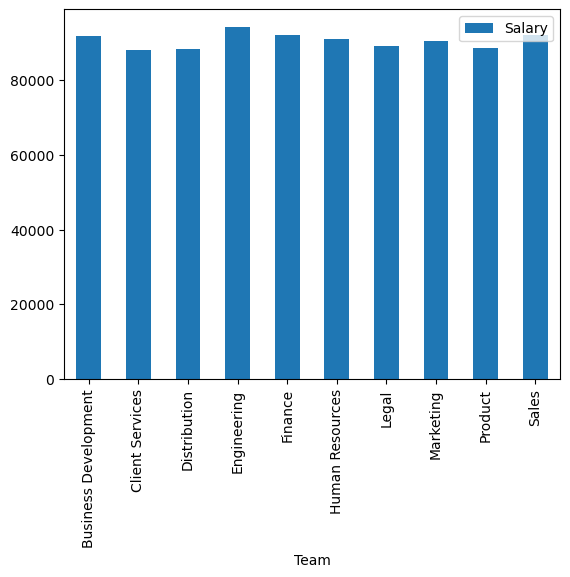

In [6]:
teams_salaries.mean().plot.bar()

# Question 4

In [7]:
date=pd.to_datetime(csv_df['Start Date'])
date

0     1993-08-06
1     1996-03-31
2     1993-04-23
3     2005-03-04
4     1998-01-24
         ...    
995   2014-11-23
996   1984-01-31
997   2013-05-20
998   2013-04-20
999   2012-05-15
Name: Start Date, Length: 1000, dtype: datetime64[ns]

# Question 5

In [8]:
timeseries=pd.Series(csv_df['Bonus %'].array,index=date)
timeseries

Start Date
1993-08-06     6.945
1996-03-31     4.170
1993-04-23    11.858
2005-03-04     9.340
1998-01-24     1.389
               ...  
2014-11-23    16.655
1984-01-31    19.675
2013-05-20     1.421
2013-04-20    11.985
2012-05-15    10.169
Length: 1000, dtype: float64

# Question 6

In [9]:
temp = pd.DataFrame({ 'start_date' :date , 'bonus' :csv_df['Bonus %'].array})
temp

,start_date,bonus
0,1993-08-06,6.945
1,1996-03-31,4.170
2,1993-04-23,11.858
3,2005-03-04,9.340
4,1998-01-24,1.389
...,...,...
995,2014-11-23,16.655
996,1984-01-31,19.675
997,2013-05-20,1.421
998,2013-04-20,11.985


<AxesSubplot:xlabel='start_date', ylabel='bonus'>

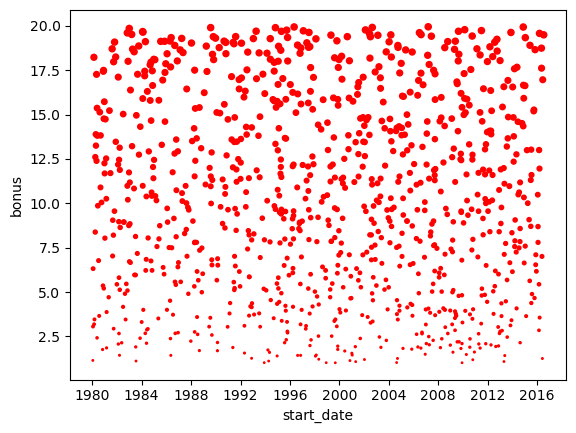

In [10]:
temp.plot.scatter(x='start_date',y='bonus',s=temp['bonus'],c='r')

# Question 7

In [11]:
timeseries[:'2008/1/1']

Start Date
1993-08-06     6.945
1996-03-31     4.170
1993-04-23    11.858
2005-03-04     9.340
1998-01-24     1.389
               ...  
1991-02-10     3.794
1987-07-24    10.982
2002-08-25    11.051
1997-05-15    19.040
1984-01-31    19.675
Length: 753, dtype: float64

# Question 8

In [12]:
timeseries.resample('3M',closed='right').mean()

Start Date
1980-01-31     3.507000
1980-04-30    10.426857
1980-07-31    10.192750
1980-10-31    12.474500
1981-01-31    11.314000
                ...    
2015-07-31    10.327500
2015-10-31    10.002500
2016-01-31     9.347143
2016-04-30     9.394667
2016-07-31    13.511167
Freq: 3M, Length: 147, dtype: float64